In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def GetSample(N = int(1e4), ncoins=3, weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [0,1]
    
    for i in range(N):
        
        if weights == None:
            Exp = np.random.choice( Events, ncoins )
        else:
            Exp = np.random.choice( Events, ncoins, p= weights )
            
        
        Sample[i] = Exp
        
    return Sample

In [26]:
N = 10000
Sample = GetSample(N,ncoins=10,weights=[0.5,0.5])

In [27]:
Sample

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [28]:
Frecuencias = np.array([], dtype = np.int64)

for i in range(Sample.shape[0]):
    
    NCaras  = 0
    
    for j in range(Sample.shape[1]):
        
        if Sample[i,j] == 0:
            NCaras += 1 
            
    Frecuencias = np.append(Frecuencias,NCaras)

In [29]:
Frecuencias

array([4, 4, 6, ..., 2, 4, 6])

(array([0.0008, 0.0096, 0.0444, 0.1177, 0.203 , 0.2495, 0.2048, 0.1164,
        0.0443, 0.0095]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

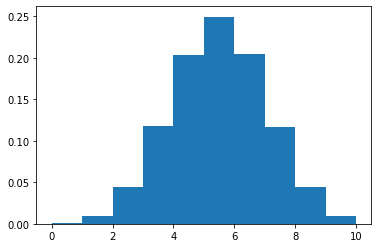

In [30]:
plt.hist(Frecuencias,density=True)

In [31]:
ii = np.where( Frecuencias == 2)
Events = len(Frecuencias[ii])
print(Events, Events/N, 3/8)

444 0.0444 0.375


# Histograma

In [34]:
bins = np.linspace(0,11,12)
bins

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [35]:
H,bines = np.histogram(Frecuencias,bins=bins)

In [36]:
H

array([   8,   96,  444, 1177, 2030, 2495, 2048, 1164,  443,   87,    8])

In [37]:
HNorm = H / np.sum(H)

In [38]:
HNorm

array([0.0008, 0.0096, 0.0444, 0.1177, 0.203 , 0.2495, 0.2048, 0.1164,
       0.0443, 0.0087, 0.0008])

In [41]:
E = np.sum(bins[:-1]*HNorm)
E

4.995299999999999

In [42]:
Var = np.sum(  (bins[:-1]-E)**2*HNorm  )
Var

2.47527791